**Background**

According to a survey by the Central Statistics Agency of Indonesia published on November 6, 2023, the unemployment rate in Indonesia is 5.32 percent [[1]](https://www.bps.go.id/id/pressrelease/2023/11/06/2002/tingkat-pengangguran-terbuka--tpt--sebesar-5-32-persen-dan-rata-rata-upah-buruh-sebesar-3-18-juta-rupiah-per-bulan.html). Although this is a decrease from previous years, it remains an issue that needs to be resolved. The results of the study by Pramudjasi and Juliansyah, 2019 in the FEB Unmul Journal [[2]](https://journal.feb.unmul.ac.id/index.php/KINERJA/article/download/5284/472) stated that the population has a significant positive effect on the unemployment rate. This is also confirmed in the research of Sari and Pangestuty, 2022 in  [[3]](https://jdess.ub.ac.id/index.php/jdess/article/download/78/57/373) stating that population growth has an impact on the increase in the Open Unemployment Rate. Various surveys and findings from this academic journal are the background for the Author in trying to analyze what factors have a strong relationship to unemployment, employment, especially factors that are related to high income.

This project focuses on the analysis of the "Adults Income" dataset with the aim of identifying and predicting factors that have a high correlation, or even contribute to employment, especially the amount of income of a person. In this case, the target feature of this dataset is whether a person's annual income is <50,000 dollars or >= 50,000 dollars per year, so this project will solve the classification case. Although this dataset is taken from the 1996 census data, this dataset still has significant relevance today, due to the general nature of the variables in this dataset and the absence of drastic changes in the components that determine incomedanya perubahan yang drastis pada komponen-komponen penentu penghasilan. 

According to Jepchumba from Microsoft [[4]](https://techcommunity.microsoft.com/t5/educator-developer-blog/getting-started-with-using-visual-machine-learning-tools-for/ba-p/3578397), *machine learning* , is a technique that uses advanced mathematics and statistics to recognize patterns in data that do not exist explicitly, and can predict according to the results of these patterns. With the variety of factors (variables) involved in this project, machine learning is the best solution. Identification and prediction of factors will be done by applying data analysis techniques such as Exploratory Data Analysis (EDA) and using Machine Learning algorithms such as Random Forest, K-Nearest Neighbors, and Boosting .

This project is a small tool to help solve the problem of difficulty in finding work, by analyzing the dynamics of high annual income factors. The results of this project are expected to help the Government and individuals in productive age as additional insight related to this problem, and help these parties to develop society and themselves to improve the quality of life.

## ***Data Understanding***

Dataset: https://archive.ics.uci.edu/dataset/2/adult 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'Dataset\adult.csv')  
df

,age,workclass,fnlwgt,education,educational-num,marital.status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital.status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   sex              48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [102]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [103]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital.status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [104]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital.status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [105]:
missing_values_check = df.columns[df.eq('?').any()]

print(missing_values_check)

Index(['workclass', 'occupation', 'native-country'], dtype='object')


From this, we can confirm that the missing values are represented by '?'. In general, missing values can also appear as NaN or Null.

----

In [106]:
df.rename(columns = {
    'education' : 'educationClass',
    'educational-num' : 'educationLevel',
    'marital-status' : 'status',
    'capital-gain' : 'gain',
    'capital-loss' : 'loss',
    'hours-per-week' : 'hours',
    'native-country' : 'native' }, inplace = True)

df

,age,workclass,fnlwgt,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [107]:
workclass_missing = (df.workclass == '?').sum()
occ_missing = (df.occupation == '?').sum()
native_missing = (df.native == '?').sum()

print(f"workclass missing values = {workclass_missing}")
print(f"occupation missing values = {occ_missing}")
print(f"native missing values = {native_missing}")

workclass missing values = 2799
occupation missing values = 2809
native missing values = 857


There are several methods to handle missing values. Since the ratio of missing values to total samples is relatively small, with a worst-case scenario of 1:7, the drop method is still a suitable choice.

In [108]:
# map target to binary classification
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# drop unnecesarry columns
df.drop(columns = 'fnlwgt', inplace = True, axis = 1)

***EDA - Univariate Analysis***

---



                  sample count  percentage
workclass                                 
Private                  33906        69.4
Self-emp-not-inc          3862         7.9
Local-gov                 3136         6.4
?                         2799         5.7
State-gov                 1981         4.1
Self-emp-inc              1695         3.5
Federal-gov               1432         2.9
Without-pay                 21         0.0
Never-worked                10         0.0


<Axes: title={'center': 'workclass'}, xlabel='workclass'>

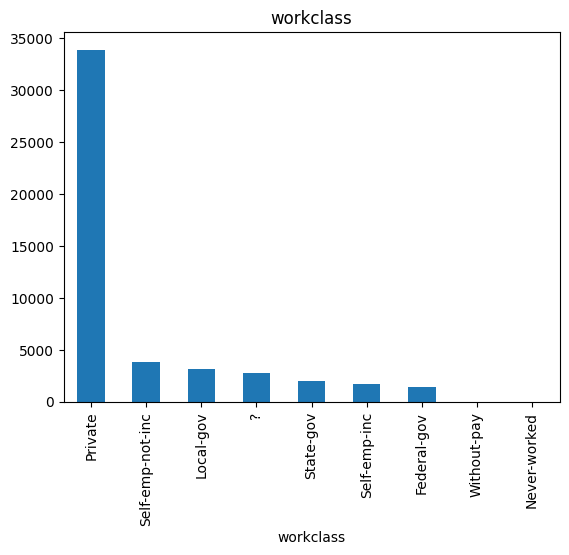

In [109]:
obj_cols = df.select_dtypes(include = ['object'])

feature = obj_cols.columns[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                sample count  percentage
educationClass                          
HS-grad                15784        32.3
Some-college           10878        22.3
Bachelors               8025        16.4
Masters                 2657         5.4
Assoc-voc               2061         4.2
11th                    1812         3.7
Assoc-acdm              1601         3.3
10th                    1389         2.8
7th-8th                  955         2.0
Prof-school              834         1.7
9th                      756         1.5
12th                     657         1.3
Doctorate                594         1.2
5th-6th                  509         1.0
1st-4th                  247         0.5
Preschool                 83         0.2


<Axes: title={'center': 'educationClass'}, xlabel='educationClass'>

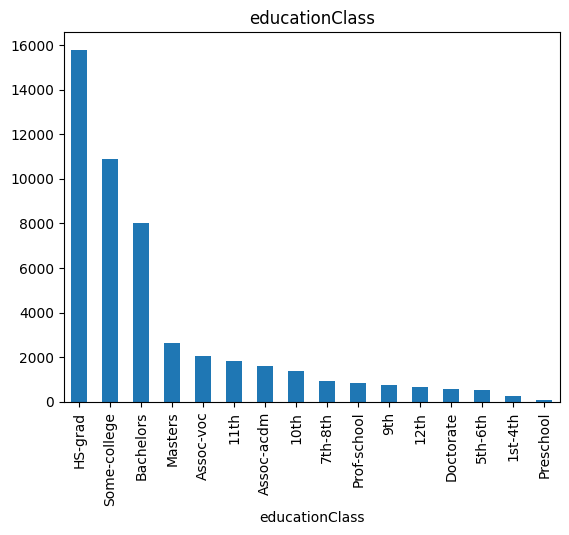

In [110]:
feature = obj_cols.columns[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                       sample count  percentage
marital.status                                 
Married-civ-spouse            22379        45.8
Never-married                 16117        33.0
Divorced                       6633        13.6
Separated                      1530         3.1
Widowed                        1518         3.1
Married-spouse-absent           628         1.3
Married-AF-spouse                37         0.1


<Axes: title={'center': 'marital.status'}, xlabel='marital.status'>

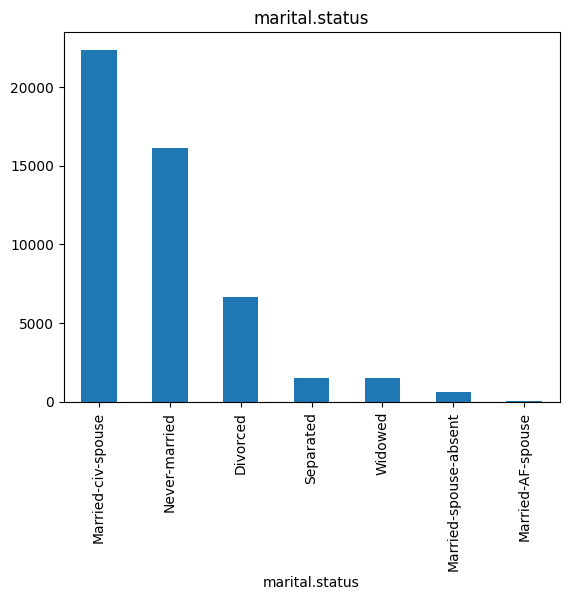

In [111]:
feature = obj_cols.columns[2]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                   sample count  percentage
occupation                                 
Prof-specialty             6172        12.6
Craft-repair               6112        12.5
Exec-managerial            6086        12.5
Adm-clerical               5611        11.5
Sales                      5504        11.3
Other-service              4923        10.1
Machine-op-inspct          3022         6.2
?                          2809         5.8
Transport-moving           2355         4.8
Handlers-cleaners          2072         4.2
Farming-fishing            1490         3.1
Tech-support               1446         3.0
Protective-serv             983         2.0
Priv-house-serv             242         0.5
Armed-Forces                 15         0.0


<Axes: title={'center': 'occupation'}, xlabel='occupation'>

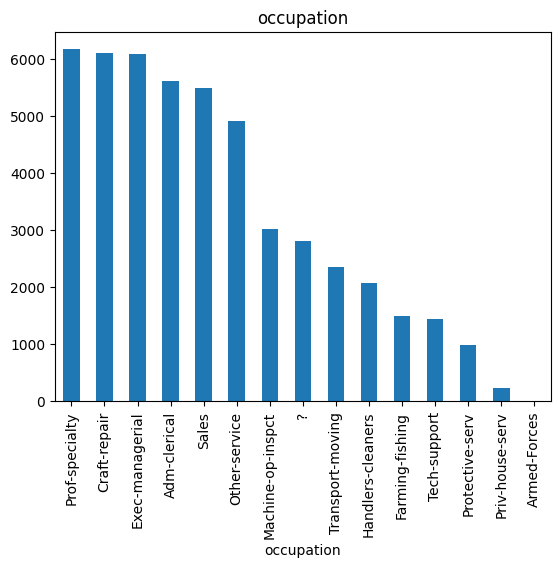

In [112]:
feature = obj_cols.columns[3]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

In [113]:
replacement_dict = {
    'Prof-specialty': 'Specialty',
    'Craft-repair': 'Repair',
    'Exec-managerial': 'Managerial',
    'Adm-clerical': 'Clerical',
    'Other-service': 'Others',
    'Machine-op-inspct': 'Inspection',
    'Transport-moving': 'Transport',
    'Handlers-cleaners': 'Cleaners',
    'Farming-fishing': 'Agriculture',
    'Tech-support': 'ITSup',
    'Protective-serv': 'ProtectiveService',
    'Priv-house-serv': 'PrivateHouse Service',
    'Armed-Forces': 'ArmedForces'
}

df['occupation'] = df['occupation'].replace(replacement_dict)

                sample count  percentage
relationship                            
Husband                19716        40.4
Not-in-family          12583        25.8
Own-child               7581        15.5
Unmarried               5125        10.5
Wife                    2331         4.8
Other-relative          1506         3.1


<Axes: title={'center': 'relationship'}, xlabel='relationship'>

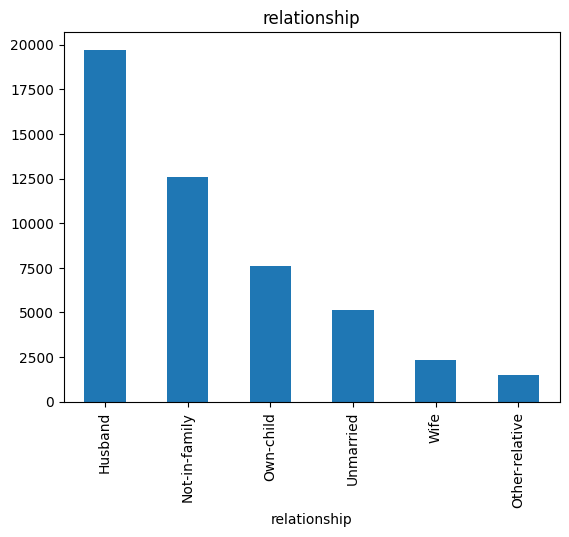

In [114]:
feature = obj_cols.columns[4]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                    sample count  percentage
race                                        
White                      41762        85.5
Black                       4685         9.6
Asian-Pac-Islander          1519         3.1
Amer-Indian-Eskimo           470         1.0
Other                        406         0.8


<Axes: title={'center': 'race'}, xlabel='race'>

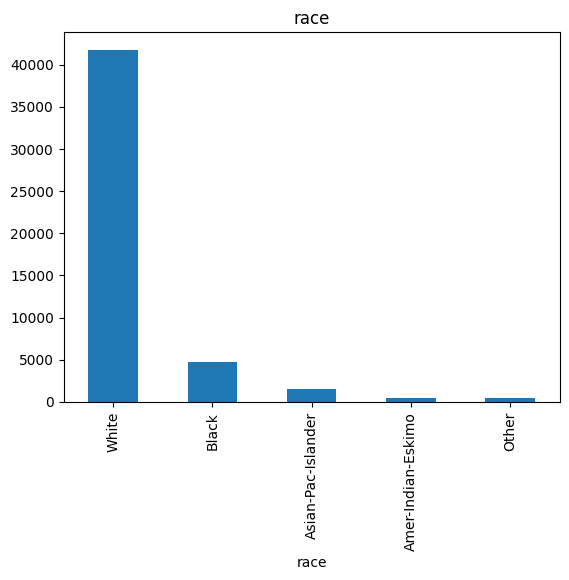

In [115]:
feature = obj_cols.columns[5]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

        sample count  percentage
sex                             
Male           32650        66.8
Female         16192        33.2


<Axes: title={'center': 'sex'}, xlabel='sex'>

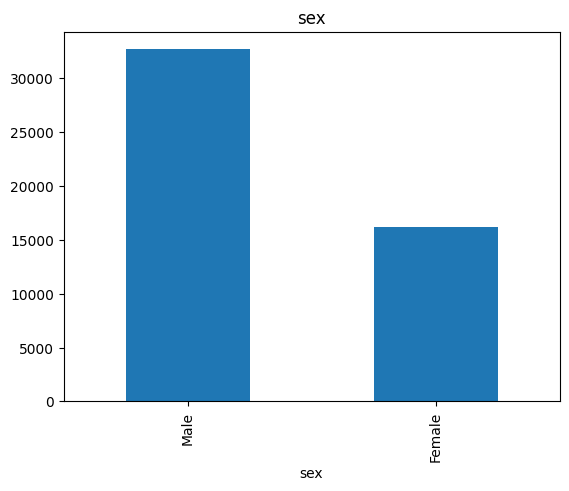

In [116]:
feature = obj_cols.columns[6]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

In [117]:
replacement_dict = {
      'United-States' : 'USA',
      'Puerto-Rico' : 'PuertoRic',
      'El-Savador' : 'ElSavad',
      'Dominican-Republic' : 'Dominican',
      'Trinadad&Tobago' : 'Trinadad',
      'Outlying-US(Guam-USVI-etc)' : 'USBor',
      'Holand-Netherlands' : 'Holland'
}

df['native'] = df['native'].replace(replacement_dict)

             sample count  percentage
native                               
USA                 43832        89.7
Mexico                951         1.9
?                     857         1.8
Philippines           295         0.6
Germany               206         0.4
PuertoRic             184         0.4
Canada                182         0.4
El-Salvador           155         0.3
India                 151         0.3
Cuba                  138         0.3
England               127         0.3
China                 122         0.2
South                 115         0.2
Jamaica               106         0.2
Italy                 105         0.2
Dominican             103         0.2
Japan                  92         0.2
Guatemala              88         0.2
Poland                 87         0.2
Vietnam                86         0.2
Columbia               85         0.2
Haiti                  75         0.2
Portugal               67         0.1
Taiwan                 65         0.1
Iran        

<Axes: title={'center': 'native'}, xlabel='native'>

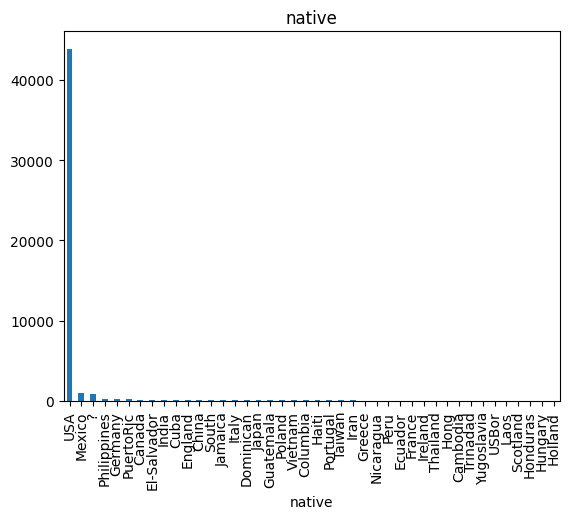

In [118]:
feature = obj_cols.columns[7]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

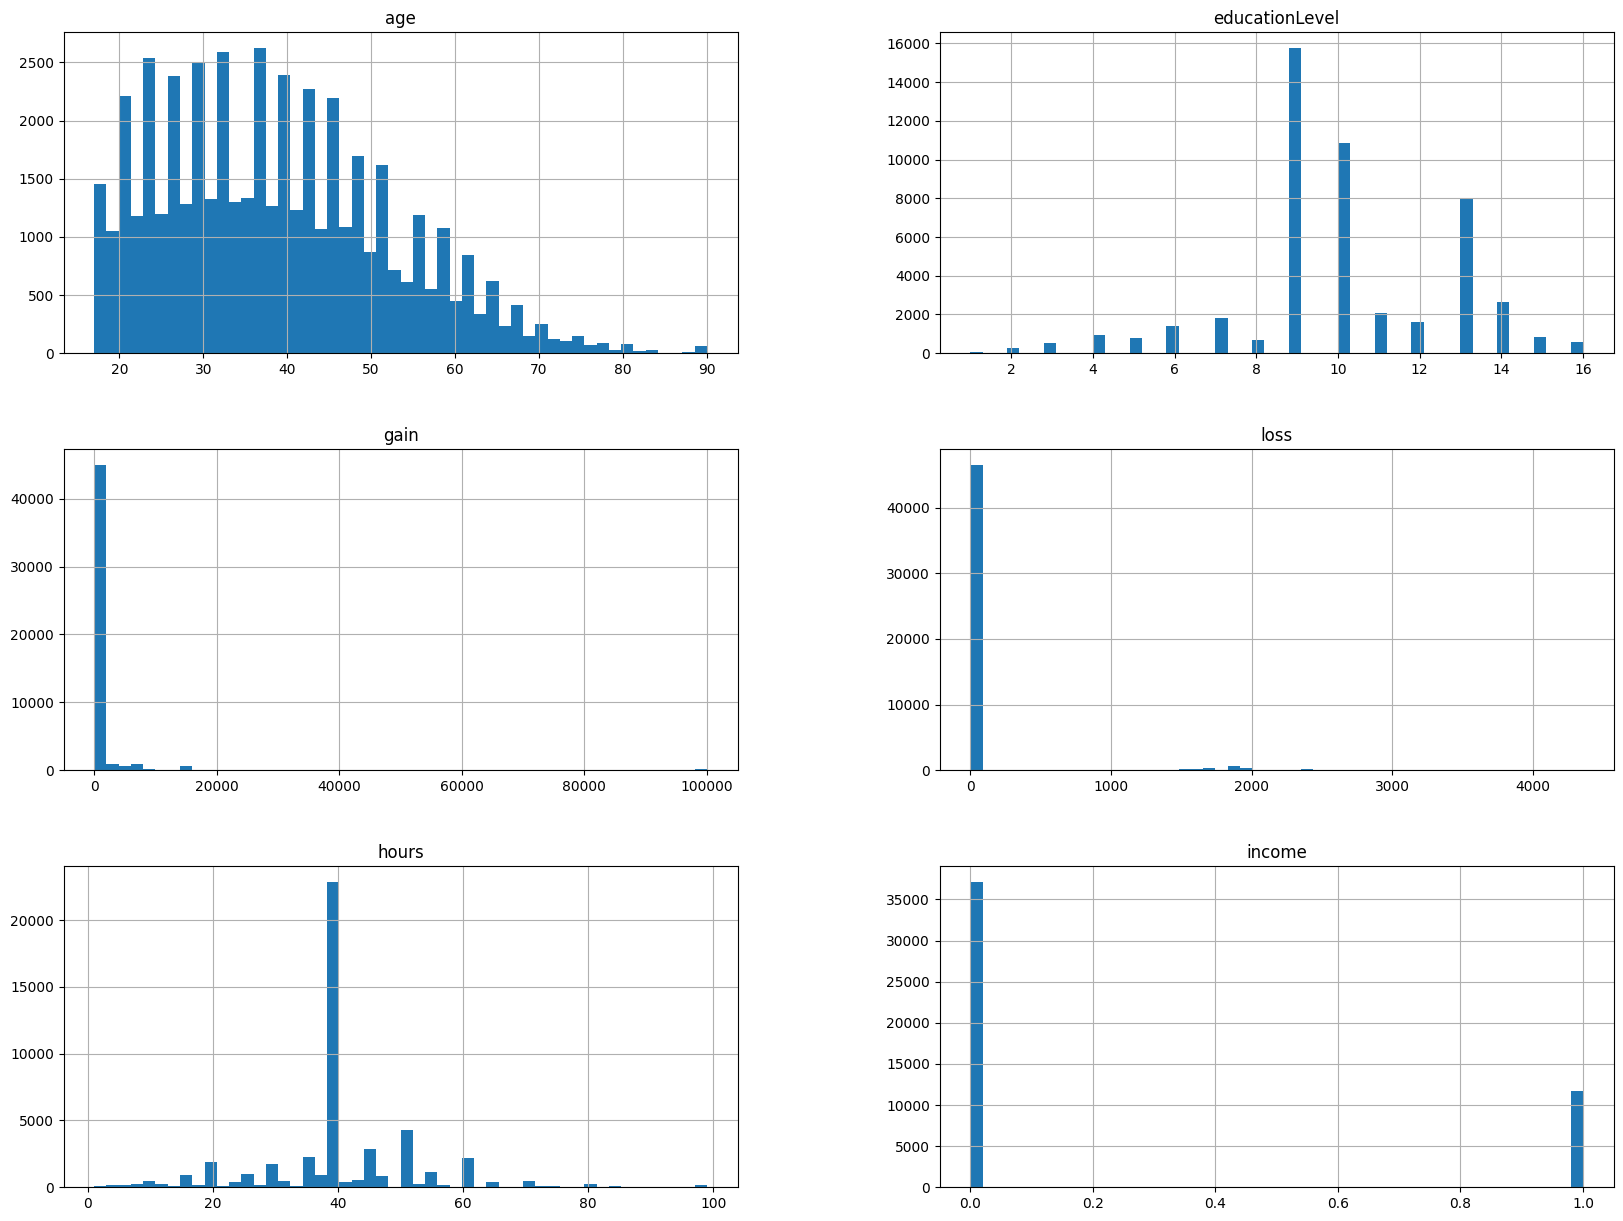

In [119]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

From the results of the Univariate Analysis, it can be seen that the dataset has a strong tendency toward a large difference between the mode and the other data. This suggests that the missing values in this dataset can also be handled using statistical methods, such as *mode imputation*.


***EDA - Multivariate Analysis***

---



C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\313010469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\313010469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\313010469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4

<Figure size 1500x800 with 0 Axes>

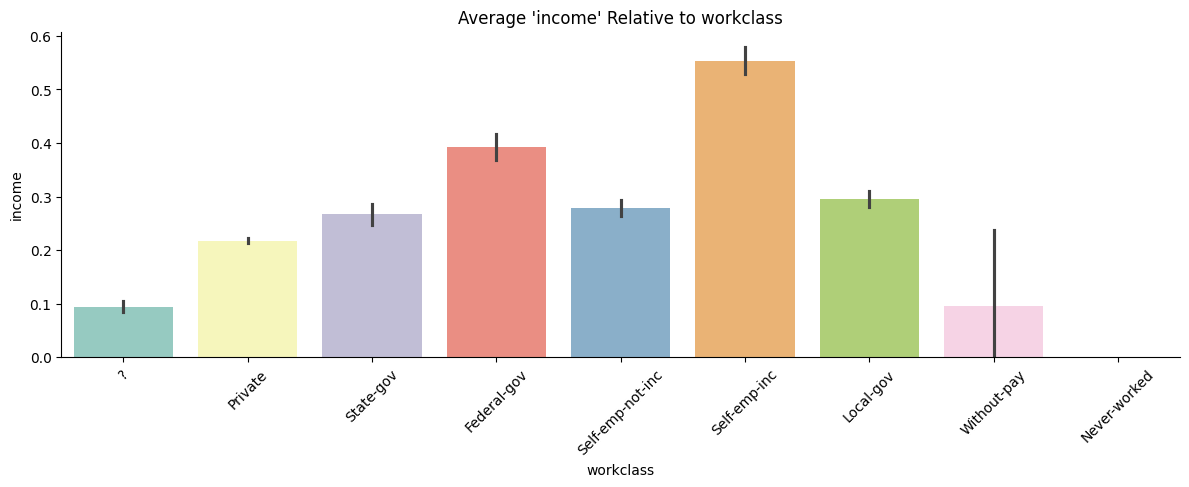

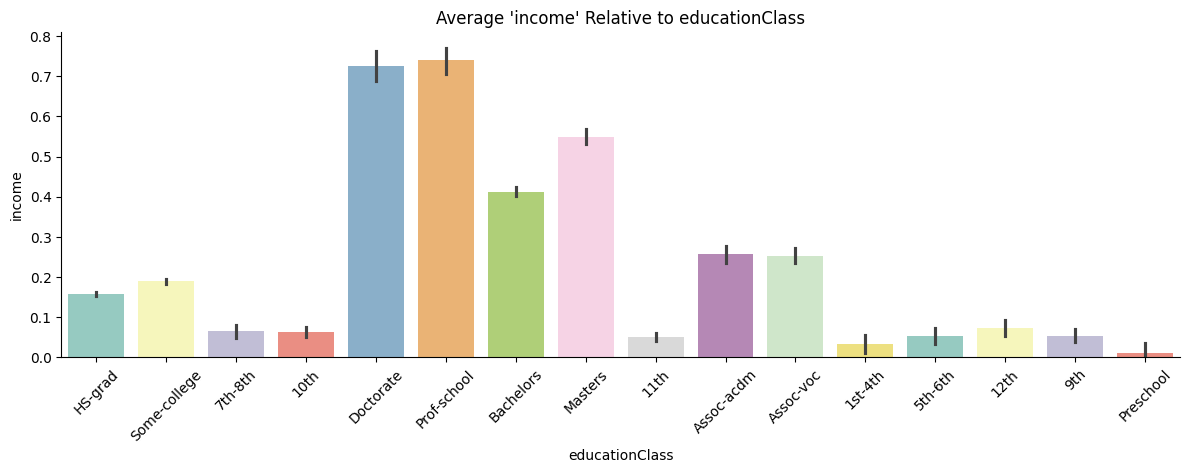

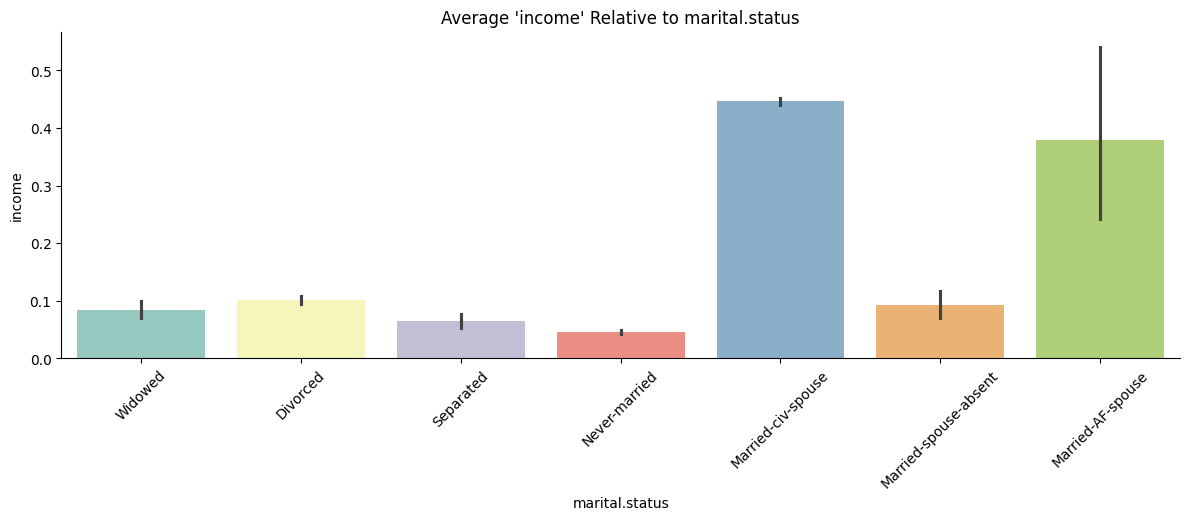

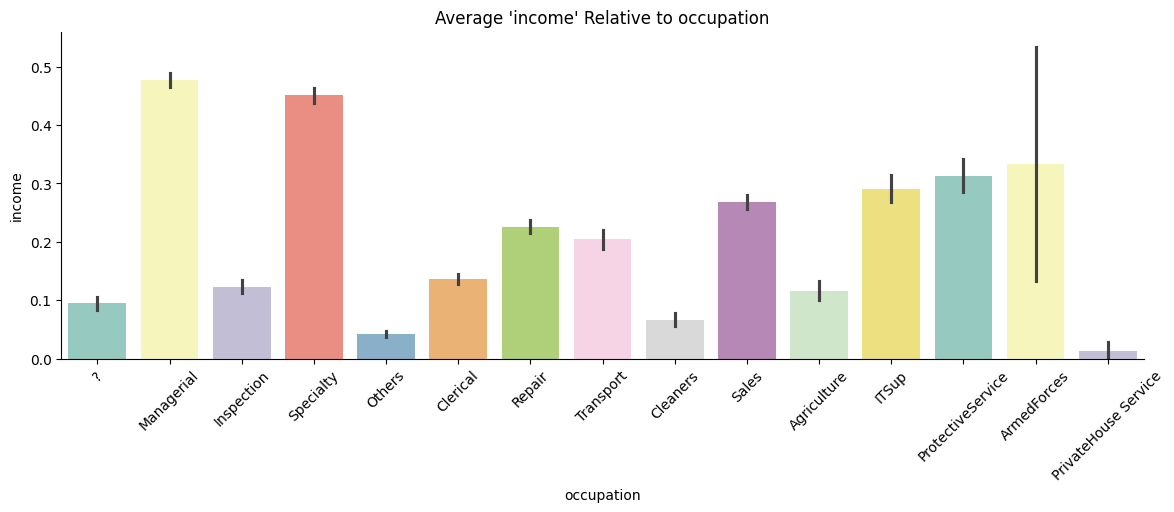

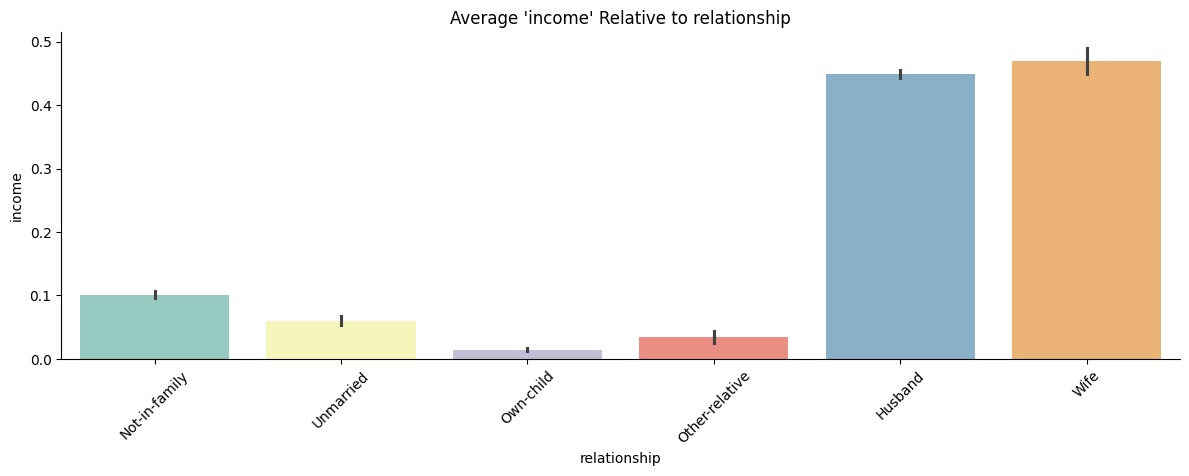

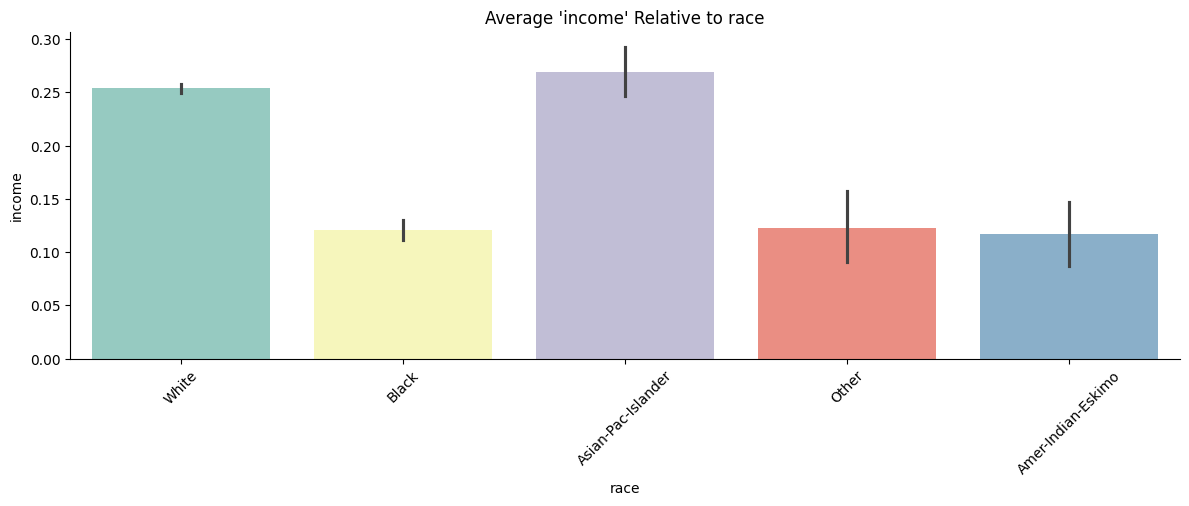

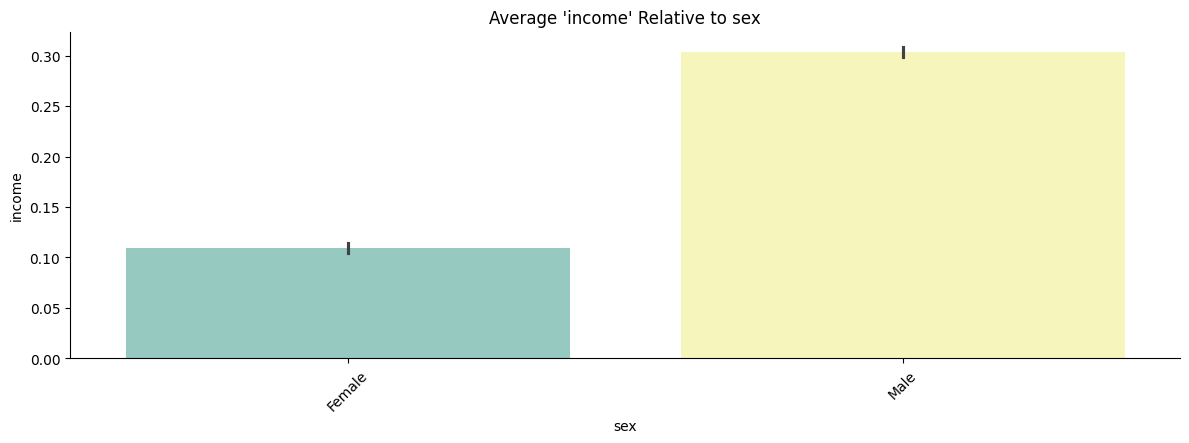

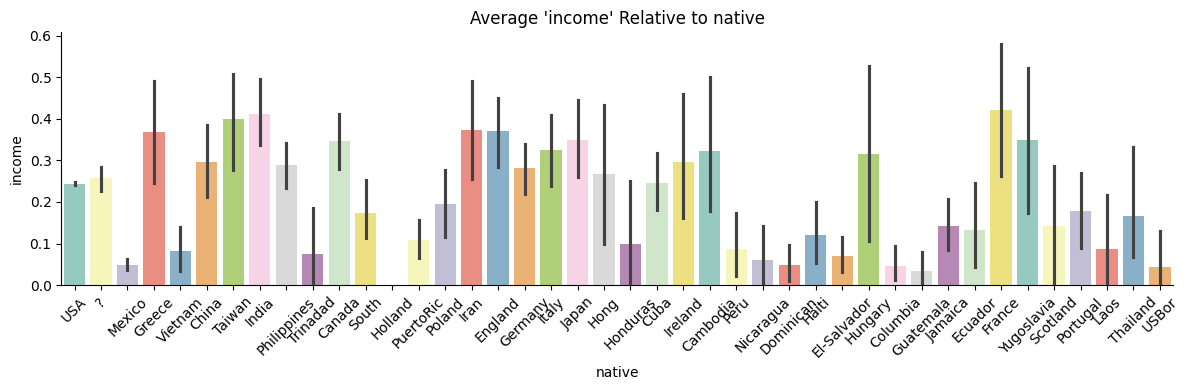

In [120]:
obj_list = obj_cols.columns.to_list()

plt.figure(figsize = (15, 8))

for col in obj_list:
  # plt.subplot(1, len(obj_list), i + 1)
  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
              data = df, palette = 'Set3')
  plt.xticks(rotation = 45)
  plt.title("Average 'income' Relative to {}".format(col))

plt.tight_layout()
plt.show()

The results of the multivariate analysis on categorical features are as follows

* **Workclass**
  All workclasses have income except for *never-worked*. People working in government sectors (-gov) tend to have higher incomes compared to other workclasses, while *self-emp-inc* has the highest income overall.

* **Education Class**
  There is a clear and significant income gap starting at the bachelor’s degree level. The gap becomes even larger for those with higher degrees such as master’s, doctorate, or professional school.

* **Marital Status**
  Individuals with stable marital status tend to earn higher incomes compared to those who are single, divorced, separated, or widowed.

* **Occupation**
  The three occupations with the highest income are specialists, executives, and security services. Other occupations do not show a clear pattern.

* **Relationship**
  Supporting the marital status findings, individuals labeled as *husband* or *wife* tend to have the highest incomes compared to other relationship types.

* **Race**
  White and Asian-Pacific groups have the highest incomes compared to other races.

* **Gender**
  Men generally earn more than women.

* **Native Country**
  There is no strong trend for income differences, meaning a person’s native country does not strongly influence income.

**Conclusion**
Among the categorical features, education level, marital status, and relationship are the most influential factors for income.


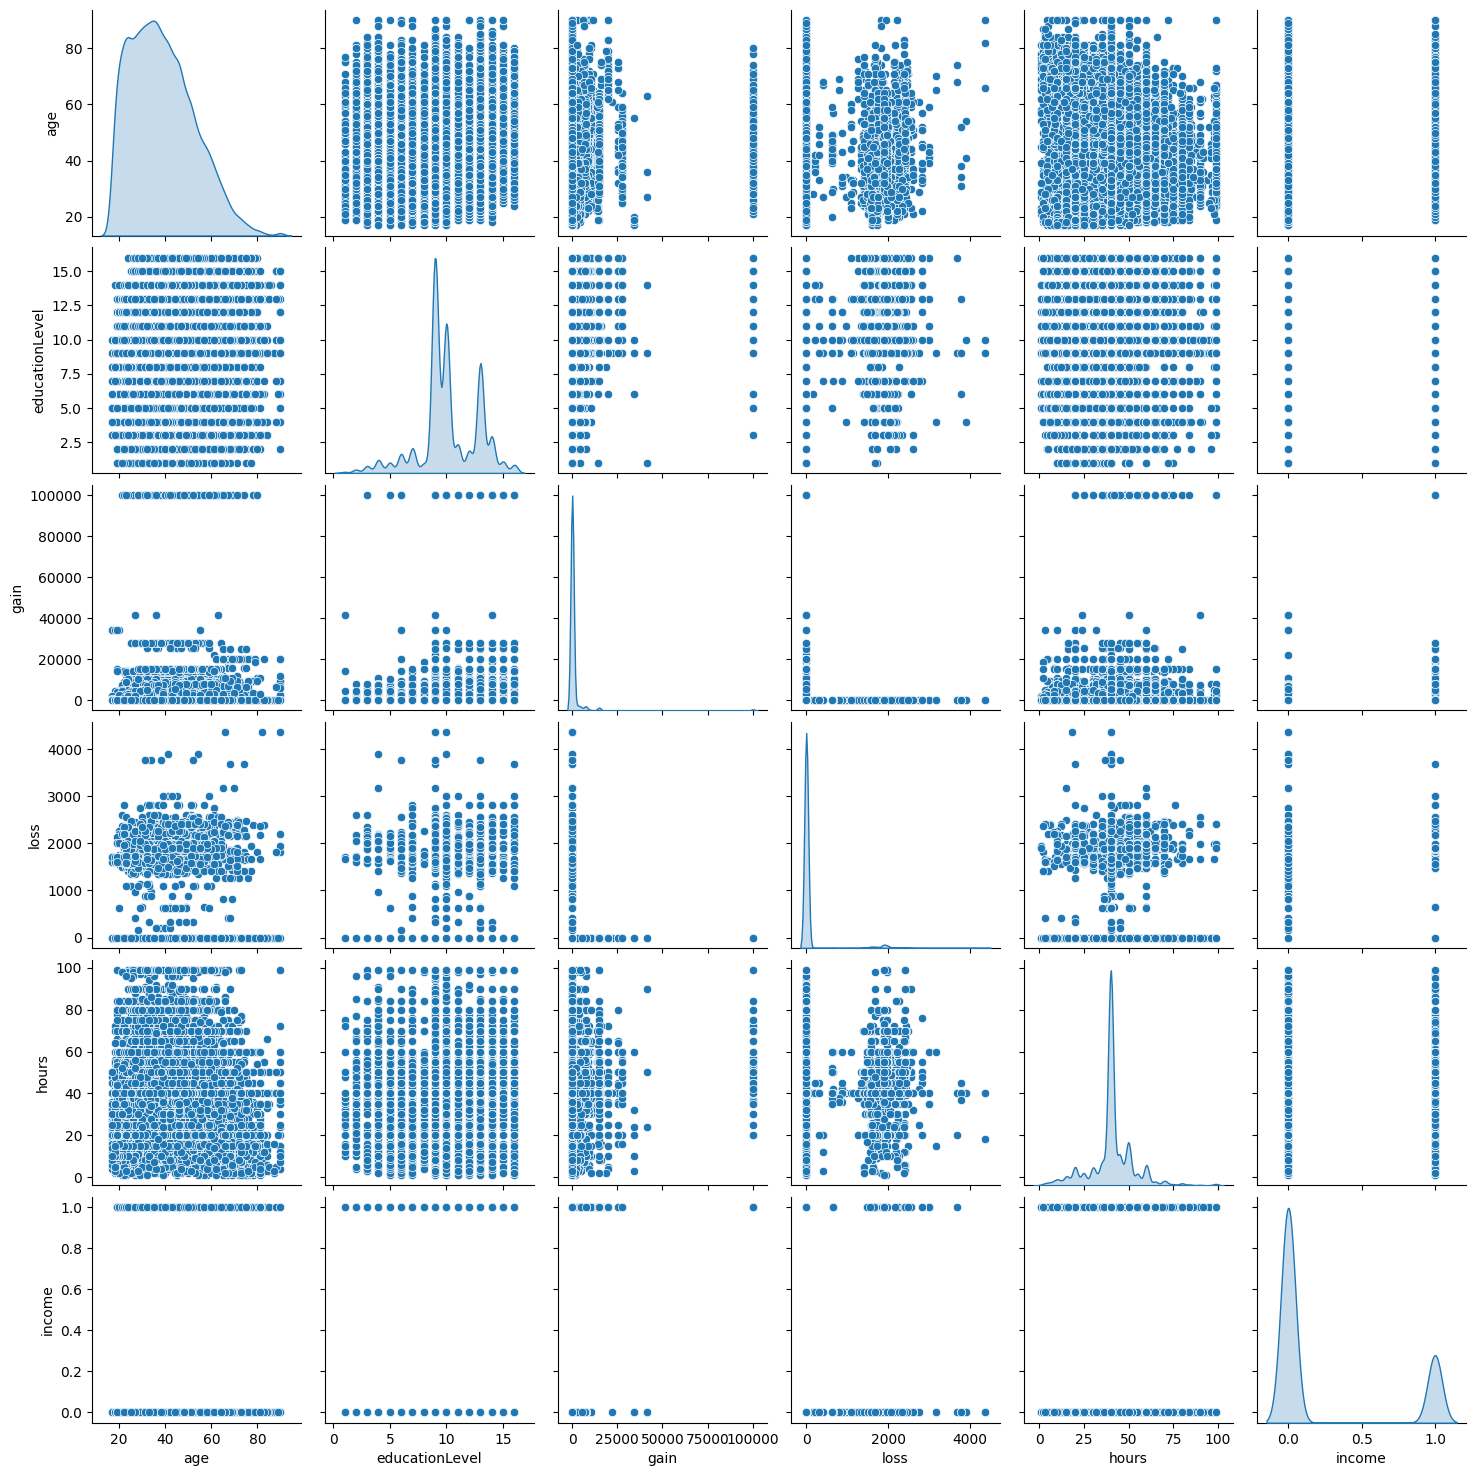

In [121]:
# Numerical Features
sns.pairplot(df, diag_kind = 'kde')

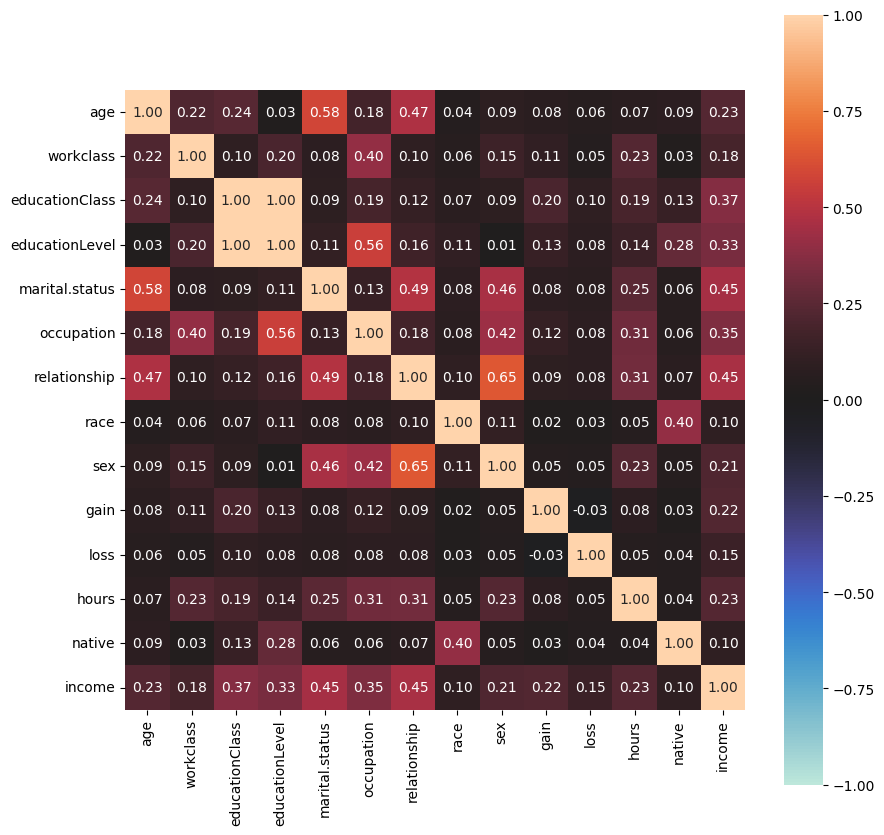

In [122]:
# Correlation Matrix
from dython.nominal import associations

complete_correlation = associations(df, filename='complete_correlation.png', figsize=(10, 10))

df_complete_corr = complete_correlation['corr']
df_complete_corr = df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')


styled_corr_matrix = df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None)

Strengthening the observations from the *Multivariate Analysis* of categorical features, it can be seen that *status* and *relationship* have the strongest correlation with *income*. However, since the range between the strongest and weakest correlation values is not too wide, no features will be dropped.

---


In [123]:
# Drop rows yang memiliki missing values
df_drop = df.loc[(df[['workclass','occupation','native']] != '?').all(axis=1)]
df_drop

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native,income
1,82,Private,HS-grad,9,Widowed,Managerial,Not-in-family,White,Female,0,4356,18,USA,0
3,54,Private,7th-8th,4,Divorced,Inspection,Unmarried,White,Female,0,3900,40,USA,0
4,41,Private,Some-college,10,Separated,Specialty,Own-child,White,Female,0,3900,40,USA,0
5,34,Private,HS-grad,9,Divorced,Others,Unmarried,White,Female,0,3770,45,USA,0
6,38,Private,10th,6,Separated,Clerical,Unmarried,White,Male,0,3770,40,USA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,Bachelors,13,Never-married,Specialty,Own-child,White,Male,0,0,40,USA,0
48837,39,Private,Bachelors,13,Divorced,Specialty,Not-in-family,White,Female,0,0,36,USA,0
48839,38,Private,Bachelors,13,Married-civ-spouse,Specialty,Husband,White,Male,0,0,50,USA,0
48840,44,Private,Bachelors,13,Divorced,Clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,USA,0


### ***Data Preparation***

---

The **Data Preparation** process will go through the following steps in order

1. Feature Encoding
2. Train Test Split
3. KNN Imputation
4. Standardization

In this stage, there will also be additional exploration, such as observing the impact of ordinality and missing value handling methods on both the data and the resulting accuracy. The data to be analyzed is divided into two main groups

* **Dropped Data**

  1. Dropped Dummy Data (One Hot Encoded)
  2. Dropped Ordinal Encoded Data (Ordinal Encoded)

* **KNN Imputed Data**

  1. KNN Imputed Ordinal Encoded Data,
     where imputation is performed **after** the Train Test Split process to prevent **Data Leakage**.

The first step is **Feature Encoding**. Both **One Hot Encoding** and **Ordinal Encoding** will be applied to observe how different encoding methods affect the preservation of ordinal properties, which may influence the model's final accuracy.
Before this process, a copy of the original dataset has been prepared, and the **drop** process has been applied.
The output of this step will be three dataframes

* Dropped One Hot Encoded Data
* Dropped Ordinal Encoded Data
* Original Ordinal Encoded Data

The second step is **Train Test Split**, where the three dataframes will be split into six, consisting of `X` and `y` for both training and testing sets.

Next, **KNN Imputation** will be performed on the **Original Ordinal Encoded Data**.
Since KNN Imputation has the potential for **Data Leakage**, it must be treated as a **transformation process** rather than preprocessing before splitting.

Finally, **Standardization** will be applied to all `X_train` and `X_test` in every dataframe to improve model performance.

The importance of [Standardization](https://developers.google.com/machine-learning/data-prep/transform/normalization#:~:text=The%20goal%20of%20normalization%20is,training%20stability%20of%20the%20model) cannot be overlooked, as it ensures model stability and better performance.

---


***Dropped Data Preparation***

In [124]:
# import Ordinal Encoding library
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_drop_ordinal = df_drop.copy()
df_drop_dum = df_drop.copy()

# Ordinal Encoded
df_drop_ordinal[obj_cols.columns] = ordinal_encoder.fit_transform(df_drop_ordinal[obj_cols.columns])

# Dummy Encoded
df_drop_dum = pd.get_dummies(df_drop_dum, columns = obj_cols.columns, drop_first = True)

df_drop_ordinal

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native,income
1,82,2.0,11.0,9,6.0,6.0,1.0,4.0,0.0,0,4356,18,37.0,0
3,54,2.0,5.0,4,0.0,5.0,4.0,4.0,0.0,0,3900,40,37.0,0
4,41,2.0,15.0,10,5.0,12.0,3.0,4.0,0.0,0,3900,40,37.0,0
5,34,2.0,11.0,9,0.0,7.0,4.0,4.0,0.0,0,3770,45,37.0,0
6,38,2.0,0.0,6,5.0,3.0,4.0,4.0,1.0,0,3770,40,37.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2.0,9.0,13,4.0,12.0,3.0,4.0,1.0,0,0,40,37.0,0
48837,39,2.0,9.0,13,0.0,12.0,1.0,4.0,0.0,0,0,36,37.0,0
48839,38,2.0,9.0,13,2.0,12.0,0.0,4.0,1.0,0,0,50,37.0,0
48840,44,2.0,9.0,13,0.0,3.0,3.0,1.0,1.0,5455,0,40,37.0,0


In [125]:
df_drop_dum

,age,educationLevel,gain,loss,hours,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_PuertoRic,native_Scotland,native_South,native_Taiwan,native_Thailand,native_Trinadad,native_USA,native_USBor,native_Vietnam,native_Yugoslavia
1,82,9,0,4356,18,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,4,0,3900,40,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,41,10,0,3900,40,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
5,34,9,0,3770,45,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
6,38,6,0,3770,40,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,13,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
48837,39,13,0,0,36,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
48839,38,13,0,0,50,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
48840,44,13,5455,0,40,0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [126]:
df

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,USA,0
1,82,Private,HS-grad,9,Widowed,Managerial,Not-in-family,White,Female,0,4356,18,USA,0
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,USA,0
3,54,Private,7th-8th,4,Divorced,Inspection,Unmarried,White,Female,0,3900,40,USA,0
4,41,Private,Some-college,10,Separated,Specialty,Own-child,White,Female,0,3900,40,USA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Specialty,Not-in-family,White,Female,0,0,36,USA,0
48838,64,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,USA,0
48839,38,Private,Bachelors,13,Married-civ-spouse,Specialty,Husband,White,Male,0,0,50,USA,0
48840,44,Private,Bachelors,13,Divorced,Clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,USA,0


In [127]:
ordinal_encoder = OrdinalEncoder()
df.replace('?', np.nan, inplace = True)

df[obj_cols.columns] = ordinal_encoder.fit_transform(df[obj_cols.columns])

df.isna().sum()

age                  0
workclass         2799
educationClass       0
educationLevel       0
marital.status       0
occupation        2809
relationship         0
race                 0
sex                  0
gain                 0
loss                 0
hours                0
native             857
income               0
dtype: int64

In [128]:
# train test split
from sklearn.model_selection import train_test_split

# Dropped Dummy Encoded data
x_drop_dum = df_drop_dum.drop(['income'], axis = 1)
y_drop_dum = df_drop_dum['income']

# Dropped Ordinal Encoded data
x_drop_ordinal = df_drop_ordinal.drop(['income'], axis = 1)
y_drop_ordinal = df_drop_ordinal['income']

# Original data, to be KNN Imputed
x_kimp = df.drop(['income'], axis = 1)
y_kimp = df['income']

# train test split
x_train_dd, x_test_dd, y_train_dd, y_test_dd = train_test_split(x_drop_dum, y_drop_dum, test_size = 0.1, random_state = 123)
x_train_do, x_test_do, y_train_do, y_test_do = train_test_split(x_drop_ordinal, y_drop_ordinal, test_size = 0.1, random_state = 123)
x_train_kimp, x_test_kimp, y_train_kimp, y_test_kimp = train_test_split(x_kimp, y_kimp, test_size = 0.1, random_state = 123)

# print results
print(f"Total sample in dataset (dum): {len(x_drop_dum)}")
print(f"Total sample in dataset (do): {len(x_drop_ordinal)}")
print(f"Total sample in dataset (kimp): {len(x_kimp)}")
print(f"Total train samples (dum): {len(x_train_dd)}")
print(f"Total train samples (do): {len(x_train_do)}")
print(f"Total train samples (kimp): {len(x_train_kimp)}")
print(f"Total test samples (do): {len(x_test_do)}")
print(f"Total test samples (dum): {len(x_test_dd)}")
print(f"Total test samples (kimp): {len(x_test_kimp)}")

Total sample in dataset (dum): 45222
Total sample in dataset (do): 45222
Total sample in dataset (kimp): 48842
Total train samples (dum): 40699
Total train samples (do): 40699
Total train samples (kimp): 43957
Total test samples (do): 4523
Total test samples (dum): 4523
Total test samples (kimp): 4885


### ***KNN Imputation Data Preparation***

---

KNN Imputation is performed during the **Data Preparation** process, **after the train test split**, because this method has the potential for **Data Leakage**.
Therefore, it must be treated as a **transformation step** rather than preprocessing before splitting.

Just like the **Data Preparation** process for the **Dropped Data**, **Feature Encoding** will be carried out first, followed by **Standardization**.


In [129]:
# check initial train missing values
missing_values_check1 = x_train_kimp.columns[x_train_kimp.eq(np.nan).any()]

print(missing_values_check1)

Index([], dtype='object')


In [130]:
# check initial test missing values
missing_values_check2 = x_test_kimp.columns[x_test_kimp.eq(np.nan).any()]

print(missing_values_check2)

Index([], dtype='object')


In [131]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 6)

x_train_kimp_imputed = imputer.fit_transform(x_train_kimp)
x_train_kimp_imputed= pd.DataFrame(x_train_kimp_imputed, columns = x_train_kimp.columns)

x_train_kimp_imputed

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native
0,17.0,3.0,1.0,7.0,4.0,7.000000,3.0,2.0,1.0,0.0,0.0,16.0,13.0
1,32.0,4.0,8.0,11.0,0.0,6.000000,1.0,4.0,0.0,10520.0,0.0,80.0,11.0
2,41.0,3.0,9.0,13.0,2.0,12.000000,0.0,4.0,1.0,0.0,0.0,56.0,37.0
3,55.0,3.5,11.0,9.0,2.0,8.166667,5.0,4.0,0.0,2885.0,0.0,40.0,37.0
4,30.0,3.0,9.0,13.0,4.0,11.000000,1.0,4.0,1.0,0.0,0.0,40.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,27.0,3.0,11.0,9.0,4.0,2.000000,3.0,4.0,0.0,0.0,0.0,40.0,37.0
43953,54.0,3.0,15.0,10.0,4.0,11.000000,1.0,2.0,1.0,0.0,0.0,41.0,37.0
43954,35.0,3.0,0.0,6.0,4.0,7.000000,4.0,2.0,0.0,0.0,0.0,38.0,37.0
43955,26.0,3.0,15.0,10.0,2.0,3.000000,5.0,4.0,0.0,0.0,0.0,42.0,37.0


In [132]:
x_train_kimp_imputed.isna().sum()

age               0
workclass         0
educationClass    0
educationLevel    0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
gain              0
loss              0
hours             0
native            0
dtype: int64

In [133]:
missing_values_check_after = x_train_kimp_imputed.columns[x_train_kimp_imputed.eq('?').any()]

print(f"after - columns with missing values: {missing_values_check_after}")

after - columns with missing values: Index([], dtype='object')


As shown, the training data has been successfully imputed.

---


In [134]:
imputer = KNNImputer(n_neighbors = 6)

x_test_kimp_imputed = imputer.fit_transform(x_test_kimp)
x_test_kimp_imputed= pd.DataFrame(x_test_kimp_imputed, columns = x_test_kimp.columns)

x_test_kimp_imputed

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native
0,26.0,3.0,15.0,10.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,20.0,28.0
1,43.0,6.0,10.0,16.0,3.0,12.0,4.0,4.0,1.0,25236.0,0.0,64.0,37.0
2,42.0,3.0,15.0,10.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,50.0,37.0
3,31.0,3.0,15.0,10.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,37.0
4,22.0,3.0,15.0,10.0,4.0,12.0,1.0,4.0,1.0,0.0,0.0,40.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,18.0,3.0,11.0,9.0,4.0,7.0,3.0,4.0,1.0,0.0,0.0,20.0,37.0
4881,68.0,3.0,12.0,14.0,2.0,12.0,0.0,4.0,1.0,0.0,0.0,45.0,37.0
4882,24.0,3.0,11.0,9.0,4.0,2.0,4.0,4.0,1.0,0.0,0.0,45.0,37.0
4883,60.0,3.0,5.0,4.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,40.0,37.0


In [135]:
x_test_kimp_imputed.isna().sum()

age               0
workclass         0
educationClass    0
educationLevel    0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
gain              0
loss              0
hours             0
native            0
dtype: int64

Similarly, the test data has been successfully imputed.

---


In [136]:
x_train_do

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native
27263,34,4.0,10.0,16,2.0,12.0,0.0,4.0,1.0,0,0,32,1.0
17915,38,2.0,7.0,12,2.0,7.0,0.0,4.0,1.0,0,0,40,7.0
23081,34,5.0,11.0,9,4.0,2.0,1.0,2.0,1.0,0,0,40,37.0
36205,28,2.0,1.0,7,4.0,10.0,1.0,4.0,1.0,0,0,40,37.0
14933,26,2.0,11.0,9,0.0,2.0,3.0,4.0,0.0,0,0,40,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,48,2.0,11.0,9,2.0,0.0,0.0,4.0,1.0,0,0,70,37.0
16571,27,2.0,12.0,14,4.0,3.0,1.0,4.0,0.0,0,0,46,37.0
19118,23,2.0,15.0,10,4.0,11.0,3.0,4.0,1.0,0,0,40,37.0
30237,25,2.0,11.0,9,4.0,10.0,1.0,4.0,1.0,0,0,75,37.0


***Standardization***

---


In [137]:
# Standardization for dummy dataset
from sklearn.preprocessing import StandardScaler

numerical_values_dum = ['age', 'educationLevel', 'gain', 'loss', 'hours']
scaler = StandardScaler()
scaler.fit(x_train_dd[numerical_values_dum])
x_train_dd[numerical_values_dum] = scaler.transform(x_train_dd.loc[:, numerical_values_dum])
x_train_dd[numerical_values_dum].head()

,age,educationLevel,gain,loss,hours
27263,-0.344450,2.303681,-0.147199,-0.220221,-0.744010
17915,-0.041813,0.737172,-0.147199,-0.220221,-0.077625
23081,-0.344450,-0.437710,-0.147199,-0.220221,-0.077625
36205,-0.798405,-1.220964,-0.147199,-0.220221,-0.077625
14933,-0.949724,-0.437710,-0.147199,-0.220221,-0.077625


In [138]:
# Standardize dummy dataset test set

x_test_dd.loc[:, numerical_values_dum] = scaler.transform(x_test_dd[numerical_values_dum])
x_test_dd

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188812524.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.84966971  2.22796616 -0.11747183 ...  0.48780249 -0.04181254
  0.10950604]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_dd.loc[:, numerical_values_dum] = scaler.transform(x_test_dd[numerical_values_dum])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188812524.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-2.78747318 -0.43770956  1.52042679 ...  1.52042679 -0.43770956
  0.34554498]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_dd.loc[:, numerical_values_dum] = scaler.transform(x_test_dd[numerical_values_dum])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188812524.py:3: FutureWarning: Setting an item of incompatible dt

,age,educationLevel,gain,loss,hours,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_PuertoRic,native_Scotland,native_South,native_Taiwan,native_Thailand,native_Trinadad,native_USA,native_USBor,native_Vietnam,native_Yugoslavia
18597,1.849670,-2.787473,-0.147199,-0.220221,-1.826887,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5856,2.227966,-0.437710,-0.147199,-0.220221,0.338866,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1703,-0.117472,1.520427,3.559766,-0.220221,1.588339,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37316,-0.420109,-0.437710,-0.147199,-0.220221,1.171848,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17941,0.639121,0.345545,-0.147199,-0.220221,-0.077625,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44087,-0.117472,-0.437710,-0.147199,-0.220221,-0.077625,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
33285,1.320055,-0.046082,-0.147199,-0.220221,-0.077625,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
31275,0.487802,1.520427,-0.147199,-0.220221,-0.077625,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
28971,-0.041813,-0.437710,-0.147199,-0.220221,-0.244221,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [139]:
# Standardize ordinal-encoded data

numerical_values_ord = x_train_do.select_dtypes(include = ['number']).columns # ['age'	, 'workclass',	'educationClass',	'educationLevel',	'status', 'occupation',	'relationship',	'race',	'gender',	'gain', 'loss', 'hours',	'native']
scaler = StandardScaler()
scaler.fit(x_train_do[numerical_values_ord])
x_train_do[numerical_values_ord] = scaler.transform(x_train_do.loc[:, numerical_values_ord])
x_train_do[numerical_values_ord].head()

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native
27263,-0.344450,1.877776,-0.081265,2.303681,-0.390526,1.204620,-0.883682,0.383305,0.693921,-0.147199,-0.220221,-0.744010,-5.840837
17915,-0.041813,-0.211985,-0.867057,0.737172,-0.390526,-0.161228,-0.883682,0.383305,0.693921,-0.147199,-0.220221,-0.077625,-4.823627
23081,-0.344450,2.922656,0.180666,-0.437710,0.943816,-1.527075,-0.257136,-2.024122,0.693921,-0.147199,-0.220221,-0.077625,0.262423
36205,-0.798405,-0.211985,-2.438641,-1.220964,0.943816,0.658281,-0.257136,0.383305,0.693921,-0.147199,-0.220221,-0.077625,0.262423
14933,-0.949724,-0.211985,0.180666,-0.437710,-1.724868,-1.527075,0.995955,0.383305,-1.441087,-0.147199,-0.220221,-0.077625,0.262423


In [140]:
# Standardize ordinal-encoded test set

x_test_do.loc[:, numerical_values_ord] = scaler.transform(x_test_do[numerical_values_ord])
x_test_do

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\3633539154.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.84966971  2.22796616 -0.11747183 ...  0.48780249 -0.04181254
  0.10950604]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_do.loc[:, numerical_values_ord] = scaler.transform(x_test_do[numerical_values_ord])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\3633539154.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-2.78747318 -0.43770956  1.52042679 ...  1.52042679 -0.43770956
  0.34554498]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_do.loc[:, numerical_values_ord] = scaler.transform(x_test_do[numerical_values_ord])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\3633539154.py:3: FutureWarning: Setting an item of incompatible

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native
18597,1.849670,-0.211985,-1.652849,-2.787473,2.278159,-0.161228,0.369409,-3.227836,-1.441087,-0.147199,-0.220221,-1.826887,-1.263392
5856,2.227966,1.877776,0.180666,-0.437710,-0.390526,-2.073414,-0.883682,0.383305,0.693921,-0.147199,-0.220221,0.338866,0.262423
1703,-0.117472,-0.211985,0.442597,1.520427,1.610988,-0.434397,-0.257136,0.383305,0.693921,3.559766,-0.220221,1.588339,-2.789207
37316,-0.420109,-0.211985,0.180666,-0.437710,-0.390526,0.931450,-0.883682,0.383305,0.693921,-0.147199,-0.220221,1.171848,0.262423
17941,0.639121,-0.211985,-0.605126,0.345545,-0.390526,1.204620,-0.883682,0.383305,0.693921,-0.147199,-0.220221,-0.077625,0.262423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44087,-0.117472,-1.256865,0.180666,-0.437710,1.610988,-1.253905,1.622500,0.383305,-1.441087,-0.147199,-0.220221,-0.077625,0.262423
33285,1.320055,-0.211985,1.228389,-0.046082,-1.724868,0.931450,1.622500,0.383305,-1.441087,-0.147199,-0.220221,-0.077625,0.262423
31275,0.487802,2.922656,0.442597,1.520427,-0.390526,1.204620,-0.883682,0.383305,0.693921,-0.147199,-0.220221,-0.077625,0.262423
28971,-0.041813,2.922656,0.180666,-0.437710,-1.724868,-1.253905,-0.257136,0.383305,-1.441087,-0.147199,-0.220221,-0.244221,0.262423


In [141]:
# Standardize KNN Imputed train data

numerical_values_kimp = x_train_kimp_imputed.select_dtypes(include = ['number']).columns # ['age'	, 'workclass',	'educationClass',	'educationLevel',	'status', 'occupation',	'relationship',	'race',	'gender',	'gain', 'loss', 'hours',	'native']
scaler = StandardScaler()
scaler.fit(x_train_kimp_imputed[numerical_values_ord])
x_train_kimp_imputed[numerical_values_kimp] = scaler.transform(x_train_kimp_imputed.loc[:, numerical_values_kimp])
x_train_kimp_imputed[numerical_values_kimp].head()

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native
0,-1.579873,-0.097948,-2.392205,-1.192732,0.915953,-0.162027,0.969014,-1.980683,0.704996,-0.144168,-0.217929,-1.973330,-3.873082
1,-0.485053,0.798070,-0.588222,0.360913,-1.736389,-0.441614,-0.277984,0.391657,-1.418447,1.279464,-0.217929,3.195918,-4.217667
2,0.171839,-0.097948,-0.330510,1.137736,-0.410218,1.235909,-0.901483,0.391657,0.704996,-0.144168,-0.217929,1.257450,0.261935
3,1.193671,0.350061,0.184913,-0.415909,-0.410218,0.164158,2.216013,0.391657,-1.418447,0.246248,-0.217929,-0.034862,0.261935
4,-0.631029,-0.097948,-0.330510,1.137736,0.915953,0.956322,-0.277984,0.391657,0.704996,-0.144168,-0.217929,-0.034862,0.261935


In [142]:
# Standardize test data

x_test_kimp_imputed.loc[:, numerical_values_kimp] = scaler.transform(x_test_kimp_imputed[numerical_values_kimp])
x_test_kimp_imputed

,age,workclass,educationClass,educationLevel,marital.status,occupation,relationship,race,sex,gain,loss,hours,native
0,-0.922981,-0.097948,1.215761,-0.027498,0.915953,-1.280375,-0.277984,-3.166852,0.704996,-0.144168,-0.217929,-1.650252,-1.288697
1,0.317815,2.590106,-0.072799,2.302970,0.252868,1.235909,1.592514,0.391657,0.704996,3.270926,-0.217929,1.903606,0.261935
2,0.244827,-0.097948,1.215761,-0.027498,-0.410218,0.676735,-0.901483,0.391657,0.704996,-0.144168,-0.217929,0.772833,0.261935
3,-0.558041,-0.097948,1.215761,-0.027498,-1.736389,-0.721201,-0.277984,0.391657,0.704996,-0.144168,-0.217929,-0.034862,0.261935
4,-1.214933,-0.097948,1.215761,-0.027498,0.915953,1.235909,-0.277984,0.391657,0.704996,-0.144168,-0.217929,-0.034862,0.261935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,-1.506885,-0.097948,0.184913,-0.415909,0.915953,-0.162027,0.969014,0.391657,0.704996,-0.144168,-0.217929,-1.650252,0.261935
4881,2.142515,-0.097948,0.442625,1.526147,-0.410218,1.235909,-0.901483,0.391657,0.704996,-0.144168,-0.217929,0.368985,0.261935
4882,-1.068957,-0.097948,0.184913,-0.415909,0.915953,-1.559962,1.592514,0.391657,0.704996,-0.144168,-0.217929,0.368985,0.261935
4883,1.558611,-0.097948,-1.361358,-2.357966,-0.410218,-1.559962,-0.901483,0.391657,0.704996,-0.144168,-0.217929,-0.034862,0.261935


In [143]:
print(x_train_kimp_imputed.shape)
print(x_test_kimp_imputed.shape)

(43957, 13)
(4885, 13)


With this, the data is ready to be used by the model.


### ***Model Development***

---

The model development process can be divided into several stages,

1. **DataFrame Initialization**, preparing a dataframe to store the model training results.
2. **Pipeline Preparation**, setting up a pipeline to streamline the training process.
3. **Model Training**, training the model using the prepared data.
4. **Visualization**, visualizing the results for better understanding and evaluation.


***DataFrame Initialization***


---

In [144]:
# initialize dataframe for models

# dataframe for Dropped - OneHotEncoded data
models_dum = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for Dropped - OrdinalEncoded data
models_ord = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for KNN Imputed data
models_kimp = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

print(models_dum)
print(models_ord)
print(models_kimp)

             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN
             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN
             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN


***Training Pipeline Prep***

---



In [145]:
# pipelines

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# pipeline train function
def train(classifier, x_train, y_train, model_name, models_df):
  classifier.fit(x_train, y_train)

  pred_train = classifier.predict(x_train)

  acc_train = accuracy_score(y_true = y_train, y_pred = pred_train)
  precision_train = precision_score(y_true = y_train, y_pred = pred_train)
  recall_train = recall_score(y_true = y_train, y_pred = pred_train)
  f1score_train = f1_score(y_true = y_train, y_pred = pred_train)

  models_df.loc[model_name, 'train_acc'] = acc_train
  models_df.loc[model_name, 'train_precision'] = precision_train
  models_df.loc[model_name, 'train_recall'] = recall_train
  models_df.loc[model_name, 'train_f1Score'] = f1score_train

  return models_df

***Model Training***

---



In [146]:
# model training
forest = RandomForestClassifier(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
models_dum = train(forest, x_train_dd, y_train_dd, 'RandomForest', models_dum)
models_ord = train(forest, x_train_do, y_train_do, 'RandomForest', models_ord)
models_kimp = train(forest, x_train_kimp_imputed, y_train_kimp, 'RandomForest', models_kimp)

knn = KNeighborsClassifier(n_neighbors = 10)
models_dum = train(knn, x_train_dd, y_train_dd, 'KNN', models_dum)
models_ord = train(knn, x_train_do, y_train_do, 'KNN', models_ord)
models_kimp = train(knn, x_train_kimp_imputed, y_train_kimp, 'KNN', models_kimp)

xgb = XGBClassifier()
models_dum = train(xgb, x_train_dd, y_train_dd, 'XGBoost', models_dum)
models_ord = train(xgb, x_train_do, y_train_do, 'XGBoost', models_ord)
models_kimp = train(xgb, x_train_kimp_imputed, y_train_kimp, 'XGBoost', models_kimp)

ada = AdaBoostClassifier(n_estimators = 50, random_state = 123)
models_dum = train(ada, x_train_dd, y_train_dd, 'AdaBoost', models_dum)
models_ord = train(ada, x_train_do, y_train_do, 'AdaBoost', models_ord)
models_kimp = train(ada, x_train_kimp_imputed, y_train_kimp, 'AdaBoost', models_kimp)

***Model Explanation, Pros and Cons***

---

*Explained in the full project report (.md)*


In [147]:
models_dum

,train_acc,train_precision,train_recall,train_f1Score
KNN,0.864567,0.792259,0.61372,0.691654
RandomForest,0.880931,0.842934,0.637744,0.726122
XGBoost,0.886459,0.819129,0.694629,0.751759
AdaBoost,0.850095,0.75455,0.584434,0.658685


In [148]:
models_ord

,train_acc,train_precision,train_recall,train_f1Score
KNN,0.860439,0.786787,0.598233,0.679675
RandomForest,0.896926,0.85824,0.698997,0.770477
XGBoost,0.889457,0.821157,0.707436,0.760066
AdaBoost,0.847613,0.755917,0.567557,0.648333


In [149]:
models_kimp

,train_acc,train_precision,train_recall,train_f1Score
KNN,0.863457,0.785596,0.587904,0.672523
RandomForest,0.900107,0.8615,0.692454,0.767783
XGBoost,0.890666,0.820553,0.693122,0.751474
AdaBoost,0.850081,0.772124,0.526853,0.626333


***Visualization***

---



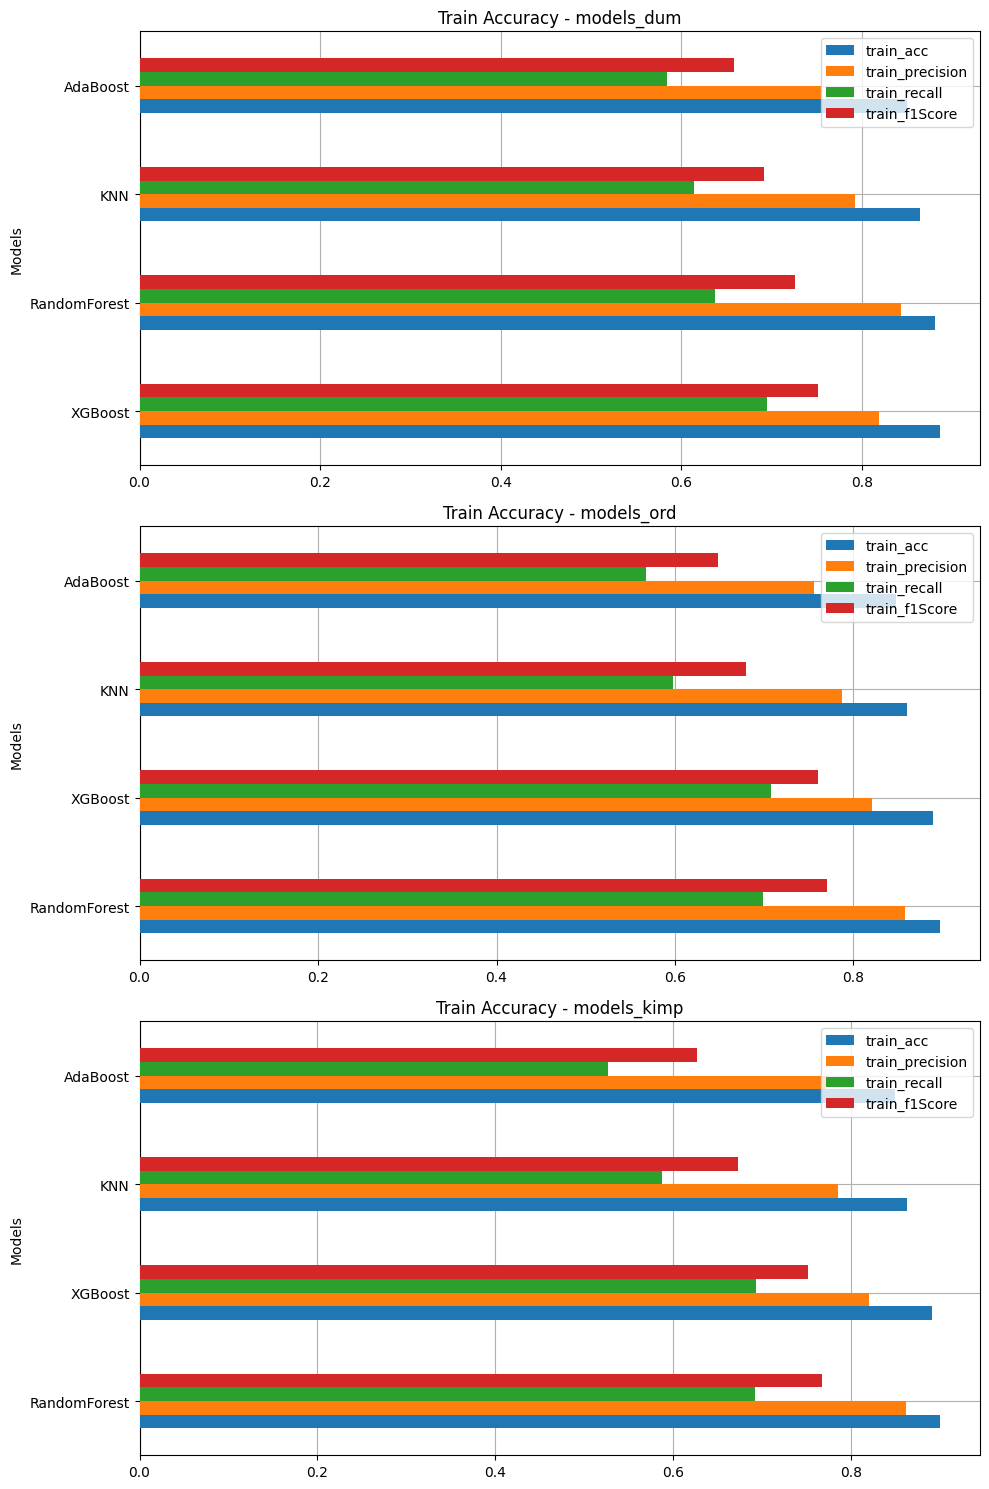

In [150]:
fig, ax = plt.subplots(nrows = 3, figsize = (10, 15))

models_dum.sort_values(by = 'train_acc', ascending = False).plot(kind = 'barh', ax = ax[0], zorder = 3)
ax[0].set_ylabel('Models')
ax[0].set_title('Train Accuracy - models_dum')
ax[0].grid(zorder = 0)

models_ord.sort_values(by = 'train_acc', ascending = False).plot(kind = 'barh', ax = ax[1], zorder = 3)
ax[1].set_ylabel('Models')
ax[1].set_title('Train Accuracy - models_ord')
ax[1].grid(zorder = 0)

models_kimp.sort_values(by = 'train_acc', ascending = False).plot(kind = 'barh', ax = ax[2], zorder = 3)
ax[2].set_ylabel('Models')
ax[2].set_title('Train Accuracy - models_kimp')
ax[2].grid(zorder = 0)

plt.tight_layout()
plt.show()

From the results above, it can be concluded that preserving data ordinality (when present) is important, using **Ordinal Encoding** or similar methods. So far, the best performance comes from **Random Forest** on **KNN Imputed Ordinal Encoded** data. However, the evaluation process will remain the same as training, but applied to the **test data**.


### ***Evaluation***

---

In this project, several evaluation metrics are used as follows.

Before diving deeper into the metrics, it is important to understand the following terms:

* **TN** = True Negative, negative data correctly predicted as negative
* **TP** = True Positive, positive data correctly predicted as positive
* **FN** = False Negative, positive data incorrectly predicted as negative
* **FP** = False Positive, negative data incorrectly predicted as positive

---

**Accuracy** is calculated using the formula:

$$
Accuracy = \frac{TN + TP}{TN + FP + TP + FN}
$$

Accuracy represents the ratio of correctly predicted data to the total data. Ideally, it shows how well the model predicts overall.
However, this metric can be **misleading for imbalanced datasets**, as it does not account for class distribution.

---

**Precision** is calculated as follows:

$$
Precision = \frac{TP}{FP + TP}
$$

Precision is the ratio of correctly predicted positive samples (TP) to the total predicted positives.
A high precision score indicates fewer false positives (FP).

---

**Recall** is given by:

$$
Recall = \frac{TP}{TP + FN}
$$

Recall measures how many actual positive samples are correctly identified.
A high recall score means fewer false negatives (FN).

---

Finally, the **F1 Score** combines Precision and Recall into a single harmonic mean:

$$
F1 Score = 2* \frac{Precision * Recall}{Precision + Recall}
$$

The F1 Score is useful for evaluating models where both Precision and Recall are important,
especially on imbalanced datasets. A high F1 Score indicates that both Precision and Recall are high.


***Initialize DataFrame and Pipeline for Testing***

---






In [151]:
# dataframe for Dropped - OneHotEncoded data
test_dum = pd.DataFrame(
    columns = ['test_acc', 'test_precision', 'test_recall', 'test_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for Dropped - OrdinalEncoded data
test_ord = pd.DataFrame(
    columns = ['test_acc', 'test_precision', 'test_recall', 'test_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for KNN Imputed data
test_kimp = pd.DataFrame(
    columns = ['test_acc', 'test_precision', 'test_recall', 'test_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])


# pipeline test function
def test(classifier, x_test, y_test, model_name, models_df):
  classifier.fit(x_test, y_test)

  pred_test = classifier.predict(x_test)

  acc_test = accuracy_score(y_true = y_test, y_pred = pred_test)
  precision_test = precision_score(y_true = y_test, y_pred = pred_test)
  recall_test = recall_score(y_true = y_test, y_pred = pred_test)
  f1score_test = f1_score(y_true = y_test, y_pred = pred_test)

  models_df.loc[model_name, 'test_acc'] = acc_test
  models_df.loc[model_name, 'test_precision'] = precision_test
  models_df.loc[model_name, 'test_recall'] = recall_test
  models_df.loc[model_name, 'test_f1Score'] = f1score_test

  return pred_test, models_df

***Model Testing***

---



In [152]:
# model testing

# Random Forest Test
forrest_test_dum, test_dum = test(forest, x_test_dd, y_test_dd, 'RandomForest', test_dum)
forrest_test_ord, test_ord = test(forest, x_test_do, y_test_do, 'RandomForest', test_ord)
forrest_test_kimp, test_kimp = test(forest, x_test_kimp_imputed, y_test_kimp, 'RandomForest', test_kimp)

# KNN Test
knn_test_dum, test_dum = test(knn, x_test_dd, y_test_dd, 'KNN', test_dum)
knn_test_ord, test_ord = test(knn, x_test_do, y_test_do, 'KNN', test_ord)
knn_test_kimp, test_kimp = test(knn, x_test_kimp_imputed, y_test_kimp, 'KNN', test_kimp)

# XGBoost Test
xgb_test_dum, test_dum = test(xgb, x_test_dd, y_test_dd, 'XGBoost', test_dum)
xgb_test_ord, test_ord = test(xgb, x_test_do, y_test_do, 'XGBoost', test_ord)
xgb_test_kimp, test_kimp = test(xgb, x_test_kimp_imputed, y_test_kimp, 'XGBoost', test_kimp)

# AdaBoost Test
ada_test_dum, test_dum = test(ada, x_test_dd, y_test_dd, 'AdaBoost', test_dum)
ada_test_ord, test_ord = test(ada, x_test_do, y_test_do, 'AdaBoost', test_ord)
ada_test_kimp, test_kimp = test(ada, x_test_kimp_imputed, y_test_kimp, 'AdaBoost', test_kimp)

test_dum

,test_acc,test_precision,test_recall,test_f1Score
KNN,0.859828,0.782413,0.611454,0.686449
RandomForest,0.922176,0.926007,0.74978,0.828627
XGBoost,0.938094,0.905213,0.84141,0.872146
AdaBoost,0.845457,0.784595,0.529515,0.632299


In [153]:
test_ord

,test_acc,test_precision,test_recall,test_f1Score
KNN,0.850984,0.772137,0.576211,0.659939
RandomForest,0.956224,0.946616,0.87489,0.909341
XGBoost,0.938757,0.900187,0.85022,0.87449
AdaBoost,0.84015,0.728889,0.577974,0.644717


In [154]:
test_kimp

,test_acc,test_precision,test_recall,test_f1Score
KNN,0.858137,0.780461,0.590532,0.67234
RandomForest,0.954759,0.935341,0.877076,0.905272
XGBoost,0.940839,0.892031,0.864618,0.878111
AdaBoost,0.851996,0.757219,0.58804,0.661992


Looking at the test results above, especially from **test\_dum** and **test\_ord**, we can see an improvement in accuracy for the two top-performing models, **Random Forest** and **XGBoost**. This confirms the importance of preserving **feature ordinality** (if present) — in this case, the *educationClass* feature in the dataset.

Consistently, **Random Forest** and **XGBoost** deliver high **accuracy** and **F1 Scores**, indicating strong and reliable model performance.

The final prediction test will use the **test\_ord** dataset because it applies **Ordinal Encoding** and maintains higher data integrity compared to the imputed dataset.
Given the dataset’s large size from the beginning, the **Drop method** remains the best missing value handling approach due to its ability to preserve the dataset's integrity.


***Test Visualization***


---





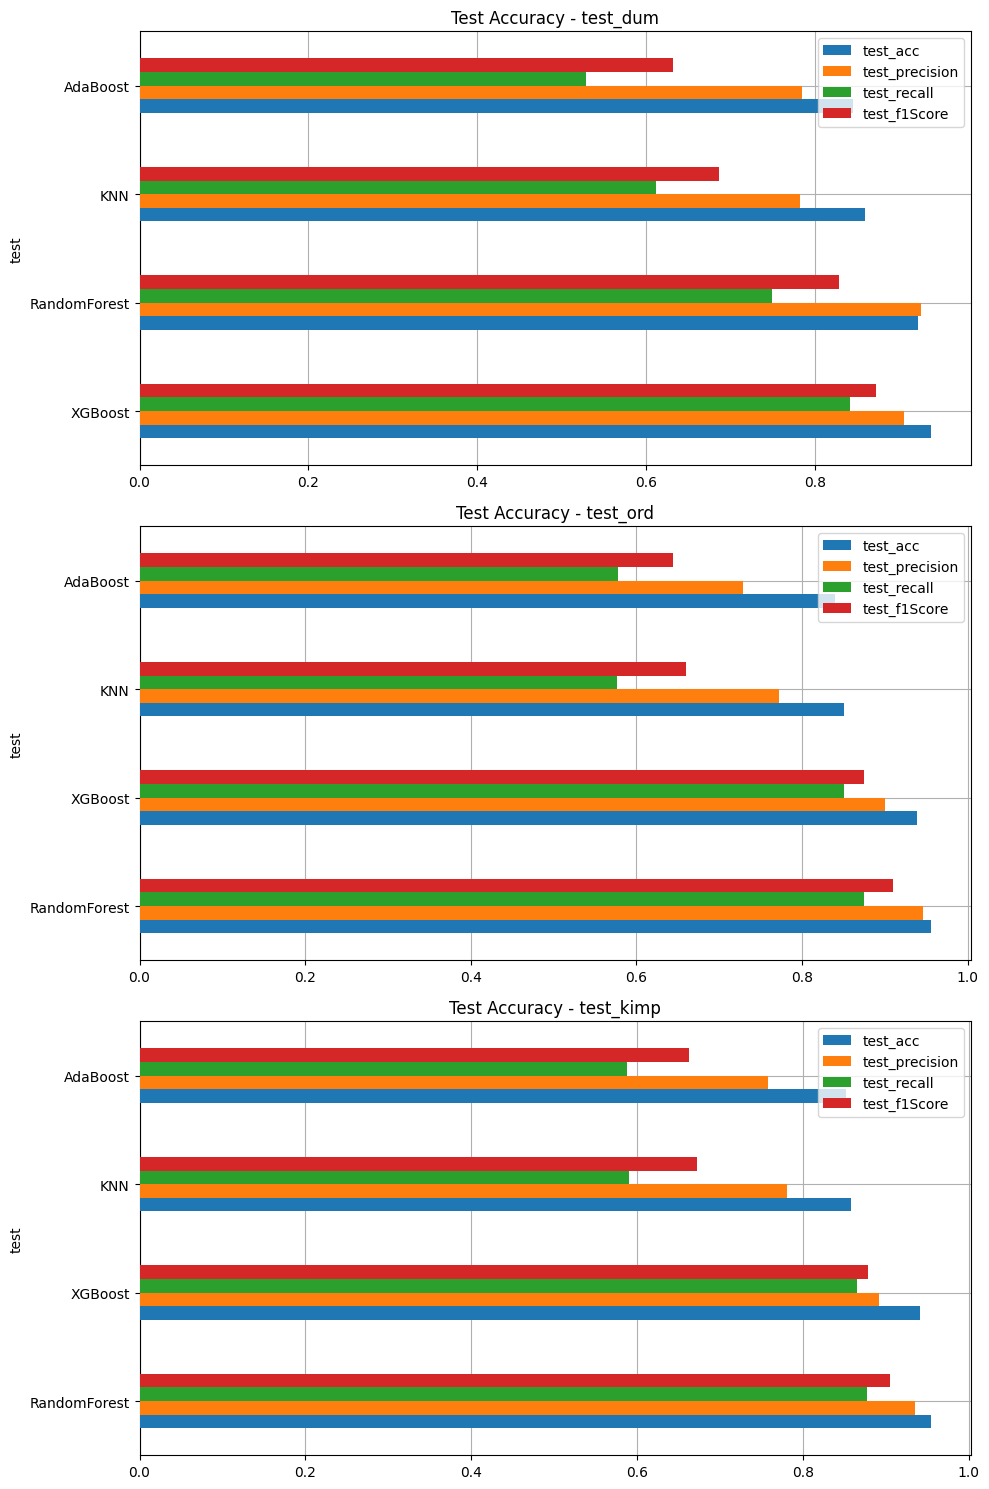

In [155]:
fig, ax = plt.subplots(nrows = 3, figsize = (10, 15))

test_dum.sort_values(by = 'test_acc', ascending = False).plot(kind ='barh', ax = ax[0], zorder = 3)
ax[0].set_ylabel('test')
ax[0].set_title('Test Accuracy - test_dum')
ax[0].grid(zorder = 0)

test_ord.sort_values(by = 'test_acc', ascending = False).plot(kind = 'barh', ax = ax[1], zorder = 3)
ax[1].set_ylabel('test')
ax[1].set_title('Test Accuracy - test_ord')
ax[1].grid(zorder = 0)

test_kimp.sort_values(by = 'test_acc', ascending = False).plot(kind = 'barh', ax = ax[2], zorder = 3)
ax[2].set_ylabel('test')
ax[2].set_title('Test Accuracy - test_kimp')
ax[2].grid(zorder = 0)

plt.tight_layout()
plt.show()

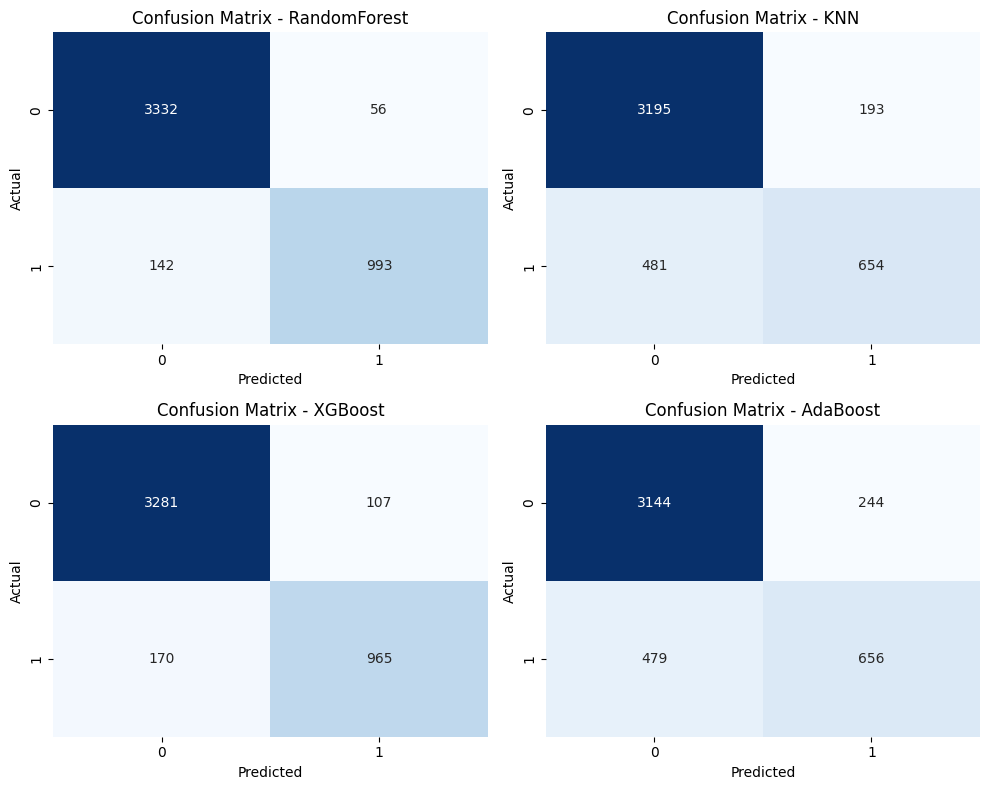

In [156]:
from sklearn.metrics import confusion_matrix

# confusion matrix builder
def plot_confusion_matrix(model_name, y_true, y_pred, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, ax = ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')


# show the confusion matrix
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))

plot_confusion_matrix('RandomForest', y_test_do, forrest_test_ord, ax[0, 0])
plot_confusion_matrix('KNN', y_test_do, knn_test_ord, ax[0, 1])
plot_confusion_matrix('XGBoost', y_test_do, xgb_test_ord, ax[1, 0])
plot_confusion_matrix('AdaBoost', y_test_do, ada_test_ord, ax[1, 1])

plt.tight_layout()
plt.show()

From the confusion matrix, it is clear that in terms of **TN**, **TP**, **FN**, and **FP**, **Random Forest** and **XGBoost** are the two models with the best performance.

Since **Random Forest** consistently achieves the highest scores across all metrics, it can be concluded that **Random Forest** is the best solution and model for this problem.


In [157]:
# Prediction
model_dict = {'KNN' : knn, 'RandomForest' : forest, 'XGBoost' : xgb, 'AdaBoost' : ada}

prediction = x_test_do.iloc[:10].copy()
pred_dict = {'y_true':y_test_do[:10]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,prediction_KNN,prediction_RandomForest,prediction_XGBoost,prediction_AdaBoost
18597,0,0,0,0,0
5856,0,0,0,0,0
1703,1,1,1,1,1
37316,0,0,0,0,0
17941,1,1,1,0,1
13946,1,1,1,1,1
38841,0,0,0,0,0
37093,0,0,0,0,1
21327,0,0,0,0,0
28112,0,0,0,0,0


***Final Conclusion***

---

1. The most influential features affecting income in this problem are **educationClass**, **status**, and **relationship**.
2. Yes, income can be predicted. Based on **Accuracy, Recall, Precision, and F1 Score**, the **Random Forest** model delivers the best performance, achieving **95.4% accuracy**, **93% precision**, **88.3% recall**, and an **F1 Score of 90.6%**. This highlights one of Random Forest's strengths, as it implicitly performs **feature selection**, while its **ensemble learning** nature helps reduce bias and overfitting.
3. Preserving **ordinality** (if present in the dataset) significantly improves model performance.
4. **KNN Imputation** provides a smaller performance boost compared to point 3, but still shows a positive impact.

---

*For more details, please refer to the full project report (.md).*
